<img src="https://live.staticflickr.com/2588/4171571040_bab4a40acf_z.jpg" width="600" height="300">

# Logistic Regression

In statistics, logistic regression is a type of regression analysis used to predict the outcome of a categorical variable (a variable that can adopt a limited number of categories) based on independent or predictor variables.

**TABLE OF CONTENTS**
* [1. Packages and Datasets](#Packages-and-Datasets)
* [2. Logistic Regresion](#Logistic-Regresion)
* [3. Support Vector Machine](#Support-Vector-Machina)
* [4. Random Forest](#Random-Forest)
* [5. XGBoost](#XGBOOST)
* [6. Model Selection](#Model-Selection)
* [7. References](#References)

# Logistic Regresion

Packages install

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
import seaborn as sns

from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

Dataset loading and path creation

In [2]:
pathfile = "../data/df_unido_definitivo.csv"
df = pd.read_csv(pathfile)
df.drop(['Unnamed: 0'], axis = 'columns', inplace = True)
df.head()

,int_rate,annual_inc,fico_range_low,fico_range_high,pub_rec,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,tot_coll_amt,tot_cur_bal,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_rcnt_rev_tl_op,mort_acc,num_bc_sats,num_tl_120dpd_2m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,application_type,emp_length,grade,hardship_flag,home_ownership,loan_status,purpose,pymnt_plan,verification_status
0,-1.326914,1.171580,0.899589,0.899572,1.201397,1.645700,0.644953,0.496383,-0.070379,-0.019969,1.965091,0.631600,1.062875,-1.755238,-0.01813,0.064164,-0.606543,0.115178,1.480831,-0.02748,0.187468,-1.027527,2.060082,1.082338,0.365039,0,1.0,0,0,1,1,1,0,0
1,2.544662,-0.387948,-0.261267,-0.261266,-0.377537,-1.726333,-0.032885,0.078142,-0.070379,-0.019969,-0.865870,-0.712643,-0.640442,1.344034,-0.01813,-2.074282,0.095377,-0.846130,-0.588304,-0.02748,-1.629146,1.477403,-0.941155,-0.937646,-0.813058,0,0.0,1,0,0,1,0,0,1
2,-1.326914,0.520515,0.567916,0.567904,-0.377537,0.083051,0.583332,0.458361,-0.070379,-0.019969,0.888317,0.082905,3.599536,-1.235665,-0.01813,-1.544575,-0.606543,1.076486,2.515399,-0.02748,0.685012,-1.106423,1.036430,-0.081818,3.038599,0,1.0,0,0,1,1,0,0,0
3,0.591176,-0.357984,-0.095430,-0.095432,2.780331,-0.410418,-0.156128,0.002098,-0.070379,-0.001552,-0.831107,-0.783683,0.385105,-1.442768,-0.01813,0.064164,-0.415110,-0.846130,0.791119,-0.02748,0.685012,-1.340292,-0.787799,-0.823838,-0.082157,0,1.0,0,0,0,1,0,0,1
4,0.591176,-0.009422,-0.261267,-0.261266,-0.377537,-1.315109,0.151980,0.192208,-0.070379,-0.019969,-0.075423,1.171392,-0.622164,1.020664,-0.01813,-0.347830,-0.478921,-0.365476,-1.278016,-0.02748,-0.472067,1.477403,-0.001468,-0.469185,-0.841910,0,1.0,0,0,1,1,0,0,1


In [3]:
x = df.drop(['loan_status'], axis='columns').values
y = df['loan_status'].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
def conf_matrix(Y_test, Y_pred):
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, with normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

By default the datasets contain the column Unnamed: 0, so we proceed to remove it in all of them

# We implemented the logistic regression model

In [6]:
%%time

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

Wall time: 1min 57s


LogisticRegression(max_iter=1000)

In [7]:
Y_pred = logreg.predict(x_test)

# Confusion Matrix

Created Function

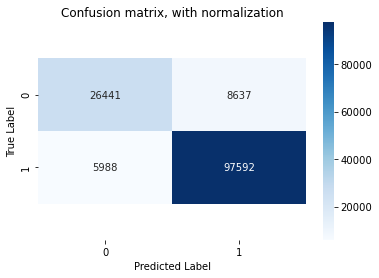

In [9]:
conf_matrix(y_test, Y_pred)

Model Accuracy

In [10]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78     35078
           1       0.92      0.94      0.93    103580

    accuracy                           0.89    138658
   macro avg       0.87      0.85      0.86    138658
weighted avg       0.89      0.89      0.89    138658



## ROC Curve

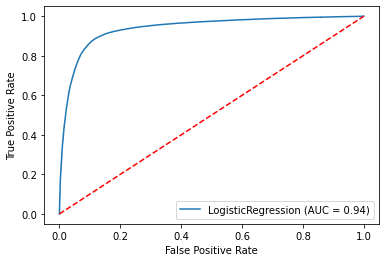

In [11]:
metrics.plot_roc_curve(logreg, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

In [12]:
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [13]:
save_models("../model/logistic_regresion",logreg)

# References

https://realpython.com/logistic-regression-python/